In [1]:
import uproot3 as uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [2]:
laserRUN1 = "../inputs/laser_time_corrections_20220408.csv"
laser9305 = "../inputs/laser_time_corrections_9305.csv"
laser9772 = "../inputs/laser_time_corrections_9772.csv"
laser9773 = "../inputs/laser_time_corrections_9773.csv"

In [3]:
voltageRUN1 = "../inputs/pmt_voltage_20220408.csv"
voltageRUN2 = "../inputs/pmt_voltage_20221219.csv"

In [4]:
def get_laser_df(LASERCORR, VOLTAGE):
    lasercorr = pd.read_csv(LASERCORR)
    voltage = pd.read_csv(VOLTAGE)
    lasercorr = lasercorr.merge( voltage[voltage.on>0], on="channel_id", how="inner" ) 
    lasercorr["laser_res"] = lasercorr.apply( lambda x : x.t_signal-(x.A+x.B*np.power(x.voltage, x.C) ) , axis=1)
    return lasercorr

In [5]:
dfRUN1 = get_laser_df(laserRUN1,voltageRUN1)
df9305 = get_laser_df(laser9305,voltageRUN2)
df9772 = get_laser_df(laser9772,voltageRUN2)
df9773 = get_laser_df(laser9773,voltageRUN2)

In [6]:
dfRUN1.head()

,channel_id,counts,t_laser_measured,t_resolution,t_laser_error,t_resolution_error,t_signal,t_signal_error,interpolated,A,B,C,voltage,on,laser_res
0,0,3001.0,561.355791,0.997546,0.019639,0.015609,253.125791,0.900214,0,215.807578,4600.533284,-0.667331,1439.0,1,1.398166
1,1,7558.0,556.438731,0.702268,0.008858,0.004622,248.208731,0.900044,0,215.807578,4600.533284,-0.667331,1637.0,1,-0.557879
2,2,8203.0,555.291726,0.706881,0.008302,0.004829,247.061726,0.900038,0,215.807578,4600.533284,-0.667331,1783.0,1,0.121597
3,3,8122.0,556.102111,0.862827,0.010343,0.006962,247.872111,0.900059,0,215.807578,4600.533284,-0.667331,1687.0,1,-0.239358
4,4,7730.0,556.869285,0.951705,0.012165,0.009227,248.639285,0.900082,0,215.807578,4600.533284,-0.667331,1695.0,1,0.629641


In [7]:
df9305.head()

,channel_id,t_laser,t_laser_resolution,t_laser_error,t_laser_resolution_error,t_signal,t_signal_error,interpolated,A,B,C,voltage,on,laser_res
0,0,0.000,0.000000,0.000000,0.000000,254.982,0.510000,1,233.094,144422,-1.21035,1431,1,0.000058
1,1,546.125,0.080991,0.002478,0.001756,251.385,0.516391,0,233.094,144422,-1.21035,1631,1,-0.391703
2,2,544.556,0.090448,0.002770,0.001974,249.816,0.517958,0,233.094,144422,-1.21035,1793,1,0.062481
3,3,545.630,0.114610,0.003507,0.002487,250.890,0.522719,0,233.094,144422,-1.21035,1681,1,-0.216230
4,4,546.030,0.218501,0.006695,0.004784,251.290,0.554836,0,233.094,144422,-1.21035,1700,1,0.427143


In [8]:
df9772.head()

,channel_id,t_laser,t_laser_resolution,t_laser_error,t_laser_resolution_error,t_signal,t_signal_error,interpolated,A,B,C,voltage,on,laser_res
0,0,0.000,0.000000,0.000000,0.000000,254.905,0.510000,1,214.773,3375.89,-0.609986,1431,1,-0.000137
1,1,542.956,0.085064,0.007224,0.005555,251.376,0.517045,0,214.773,3375.89,-0.609986,1631,1,-0.451106
2,2,541.372,0.105654,0.008735,0.006524,249.792,0.520829,0,214.773,3375.89,-0.609986,1793,1,0.044633
3,3,542.481,0.138749,0.011581,0.008900,250.901,0.528537,0,214.773,3375.89,-0.609986,1681,1,-0.249859
4,4,542.859,0.239382,0.020200,0.015668,251.279,0.563386,0,214.773,3375.89,-0.609986,1700,1,0.376690


In [9]:
df9773.head()

,channel_id,t_laser,t_laser_resolution,t_laser_error,t_laser_resolution_error,t_signal,t_signal_error,interpolated,A,B,C,voltage,on,laser_res
0,0,0.000,0.000000,0.000000,0.000000,254.949,0.510000,1,219.509,5842.39,-0.702583,1431,1,0.000157
1,1,547.690,0.096051,0.008793,0.007311,251.309,0.518966,0,219.509,5842.39,-0.702583,1631,1,-0.527715
2,2,546.107,0.094332,0.008216,0.006431,249.726,0.518651,0,219.509,5842.39,-0.702583,1793,1,-0.029863
3,3,547.225,0.132364,0.011240,0.008150,250.845,0.526897,0,219.509,5842.39,-0.702583,1681,1,-0.313110
4,4,547.673,0.206619,0.018049,0.013747,251.293,0.550265,0,219.509,5842.39,-0.702583,1700,1,0.383826


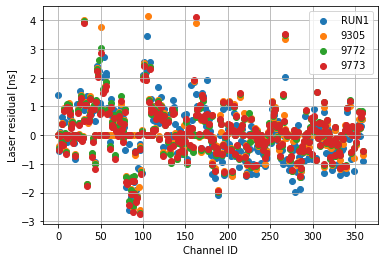

In [10]:
fig = plt.figure()
plt.scatter(dfRUN1["channel_id"], dfRUN1["laser_res"], label="RUN1")
plt.scatter(df9305["channel_id"], df9305["laser_res"], label="9305")
plt.scatter(df9772["channel_id"], df9772["laser_res"], label="9772")
plt.scatter(df9773["channel_id"], df9773["laser_res"], label="9773")

plt.legend()
plt.grid()
plt.xlabel("Channel ID")
plt.ylabel("Laser residual [ns]")
plt.show()

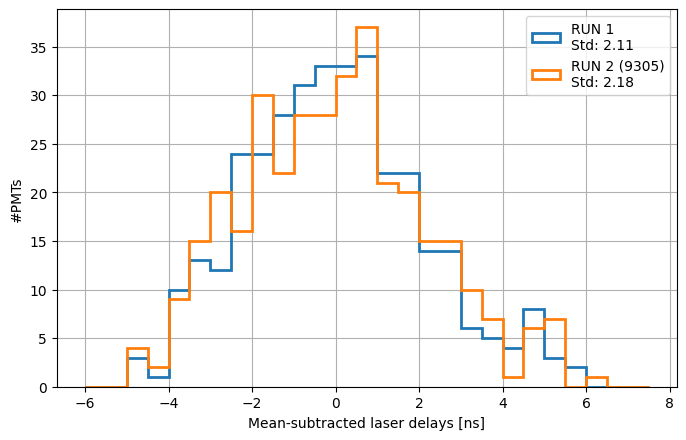

In [35]:
fig = plt.figure(figsize=(8,5),dpi=100)
mi, ma = -6,7.5
s = 0.5
n = int((ma-mi)/s)
plt.hist(dfRUN1["t_signal"]-np.mean(dfRUN1["t_signal"]), histtype="step", lw=2, bins=n, range=(mi,ma), label="RUN 1\nStd: {:.2f}".format(np.std(dfRUN1["t_signal"])))
plt.hist(df9305["t_signal"]-np.mean(df9305["t_signal"]), histtype="step", lw=2, bins=n, range=(mi,ma), label="RUN 2 (9305)\nStd: {:.2f}".format(np.std(df9305["t_signal"])))
#plt.hist(df9773["laser_res"], histtype="step", lw=2, label="9773")

plt.legend()
plt.grid()
plt.xlabel("Mean-subtracted laser delays [ns]")
plt.ylabel("#PMTs")
plt.savefig("laser_delays_comparisons.png")
plt.show()

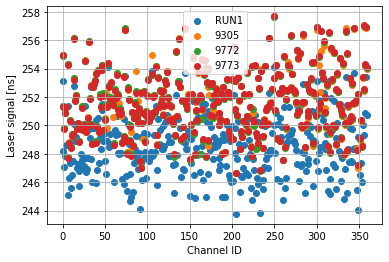

In [12]:
fig = plt.figure()
plt.scatter(dfRUN1["channel_id"], dfRUN1["t_signal"], label="RUN1")
plt.scatter(df9305["channel_id"], df9305["t_signal"], label="9305")
plt.scatter(df9772["channel_id"], df9772["t_signal"], label="9772")
plt.scatter(df9773["channel_id"], df9773["t_signal"], label="9773")

plt.legend()
plt.grid()
plt.xlabel("Channel ID")
plt.ylabel("Laser signal [ns]")
plt.show()

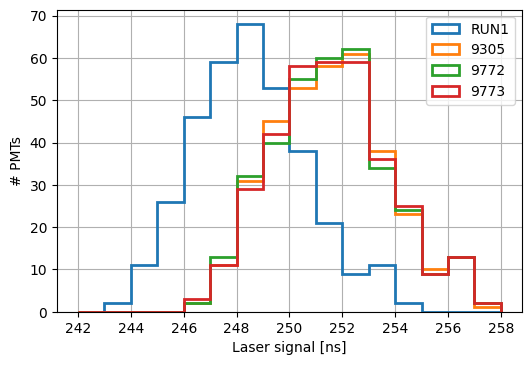

In [13]:
fig = plt.figure(dpi=100)
rmin=242
rmax=258
r=(rmin,rmax)
binsize=1
nbins = int((rmax-rmin)/binsize)

plt.hist(dfRUN1["t_signal"], histtype="step", bins=nbins, range=r, lw=2, label="RUN1")
plt.hist(df9305["t_signal"], histtype="step", bins=nbins, range=r, lw=2, label="9305")
plt.hist(df9772["t_signal"], histtype="step", bins=nbins, range=r, lw=2, label="9772")
plt.hist(df9773["t_signal"], histtype="step", bins=nbins, range=r, lw=2, label="9773")



plt.legend()
plt.grid()
plt.xlabel("Laser signal [ns]")
plt.ylabel("# PMTs")
plt.show()

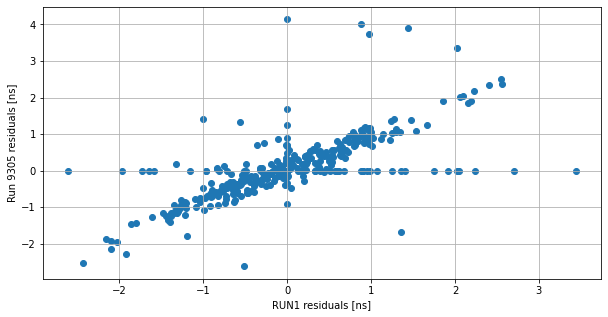

In [14]:
fig = plt.figure(figsize=(10,5))
plt.scatter(dfRUN1["laser_res"], df9305["laser_res"] )

#plt.legend()
plt.grid()
plt.xlabel("RUN1 residuals [ns]")
plt.ylabel("Run 9305 residuals [ns]")
plt.show()

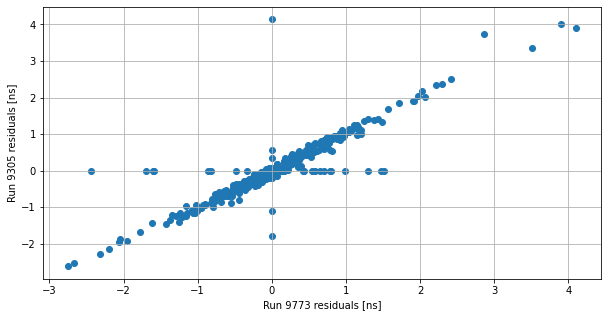

In [15]:
fig = plt.figure(figsize=(10,5))
plt.scatter(df9773["laser_res"], df9305["laser_res"] )

#plt.legend()
plt.grid()
plt.xlabel("Run 9773 residuals [ns]")
plt.ylabel("Run 9305 residuals [ns]")
plt.show()

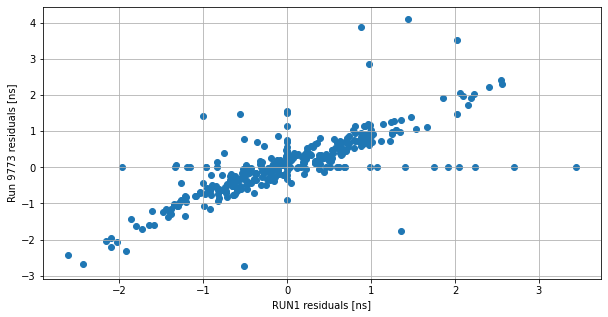

In [16]:
fig = plt.figure(figsize=(10,5))
plt.scatter(dfRUN1["laser_res"], df9773["laser_res"] )

#plt.legend()
plt.grid()
plt.xlabel("RUN1 residuals [ns]")
plt.ylabel("Run 9773 residuals [ns]")
plt.show()

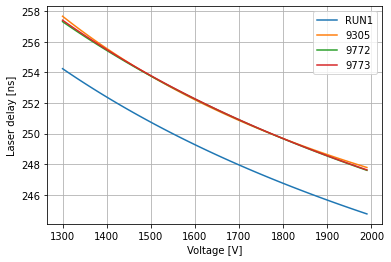

In [17]:
fig = plt.figure()
x = np.arange(1300,2000,10)

A= 215.807578
B= 4600.533284
C= -0.667331
y=A+B*np.power(x,C)
plt.plot(x, y, label="RUN1")

A= 233.094
B= 144422
C= -1.21035
y1=A+B*np.power(x,C)
plt.plot(x, y1, label="9305")

A=214.773
B=3375.89
C=-0.609986
y2=A+B*np.power(x,C)
plt.plot(x, y2, label="9772")

A=219.509
B=5842.39
C=-0.702583
y3=A+B*np.power(x,C)
plt.plot(x, y3, label="9773")

plt.grid()
plt.xlabel("Voltage [V]")
plt.ylabel("Laser delay [ns]")
plt.legend()
plt.show()

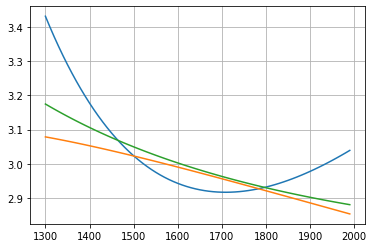

In [18]:
fig = plt.figure()
plt.plot(x, y1-y, label="9305")
plt.plot(x, y2-y, label="9772")
plt.plot(x, y3-y, label="9773")

plt.grid()
plt.show()

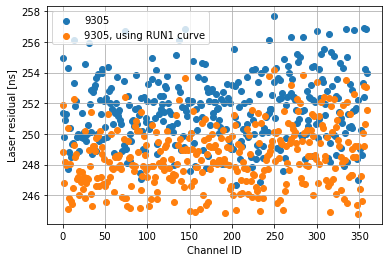

In [19]:
A= 215.807578
B= 4600.533284
C= -0.667331
df = pd.read_csv(voltageRUN2)
chs = df[df.on>0]["channel_id"].to_numpy()
x = df[df.on>0]["voltage"].to_numpy()
y=A+B*np.power(x,C)

fig = plt.figure()
plt.scatter(df9305["channel_id"], df9305["t_signal"], label="9305")
plt.scatter(chs, y, label="9305, using RUN1 curve")

plt.legend()
plt.grid()
plt.xlabel("Channel ID")
plt.ylabel("Laser residual [ns]")
plt.show()

f = open("estimated_laser_corrections.csv","w")
f.write("channel_id,t_signal\n")
for i,v in enumerate(y):
    res = df9305[df9305.channel_id==chs[i]]["laser_res"].values[0]
    f.write("{},{}\n".format(chs[i],v+res))
    
for c in range(0,360):
    if c not in chs:
        f.write("{},{}\n".format(c,0))

f.close()

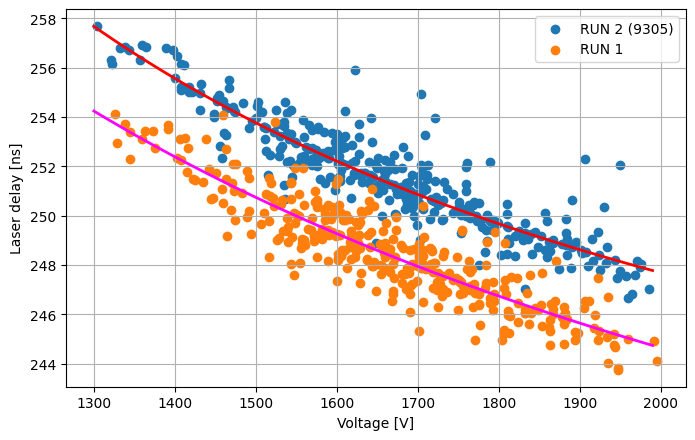

In [48]:
fig = plt.figure(figsize=(8,5),dpi=100)
plt.scatter(df9305["voltage"], df9305["t_signal"], label="RUN 2 (9305)")
x = np.arange(1300,2000,10)
A= 233.094
B= 144422
C= -1.21035
y1=A+B*np.power(x,C)
plt.plot(x, y1, lw=2,color="red")
plt.scatter(dfRUN1["voltage"], dfRUN1["t_signal"], label="RUN 1")
A= 215.807578
B= 4600.533284
C= -0.667331
y=A+B*np.power(x,C)
plt.plot(x, y, lw=2, color="magenta")

plt.grid()
plt.xlabel("Voltage [V]")
plt.ylabel("Laser delay [ns]")

plt.legend()
plt.savefig("laser_check.png")
plt.show()

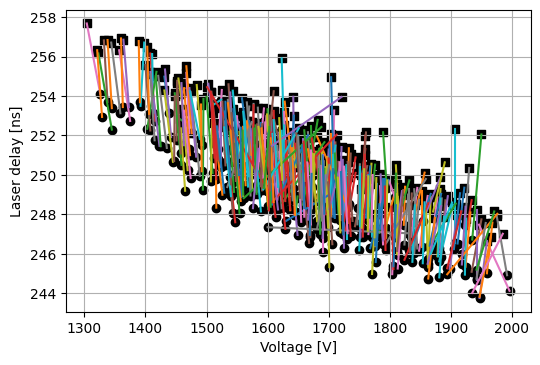

In [40]:
fig = plt.figure(dpi=100)
diff = []
for ch in dfRUN1.channel_id.to_numpy():
    v = [ dfRUN1[dfRUN1.channel_id==ch]["voltage"].values[0], df9305[df9305.channel_id==ch]["voltage"].values[0] ]
    r = [ dfRUN1[dfRUN1.channel_id==ch]["t_signal"].values[0], df9305[df9305.channel_id==ch]["t_signal"].values[0] ]
    if len(v) < 2 or len(r) < 2:
        continue
    plt.plot(v,r)
    plt.scatter(v[0],r[0],color="black",marker="o")
    plt.scatter(v[1],r[1],color="black",marker="s")
    diff.append(r[1]-r[0])
    
plt.grid()
plt.xlabel("Voltage [V]")
plt.ylabel("Laser delay [ns]")
plt.show()

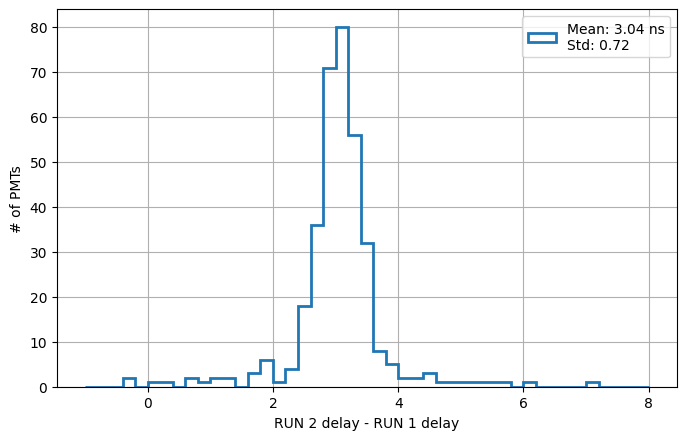

In [50]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi, ma = -1.,8.
s = 0.2
n = int((ma-mi)/s)
plt.hist(diff, histtype="step", bins=n, range=(mi,ma), lw=2, label="Mean: {:.2f} ns\nStd: {:.2f}".format(np.mean(diff), np.std(diff)))

plt.grid()
plt.xlabel("RUN 2 delay - RUN 1 delay")
plt.ylabel("# of PMTs")
plt.legend()
plt.savefig("laser_check_diff.png")
plt.show()

In [41]:
print ("INTERPOLATED: ", len(dfRUN1[dfRUN1.interpolated==1]))
print(dfRUN1[dfRUN1.interpolated==1].channel_id.to_numpy())

INTERPOLATED:  26
[ 23  55  73  82  85 106 107 111 133 163 191 208 218 231 300 301 303 305
 307 308 309 334 347 348 351 353]


In [42]:
print("INTERPOLATED: ", len(df9305[df9305.interpolated==1]))
print(df9305[df9305.interpolated==1].channel_id.to_numpy())

INTERPOLATED:  56
[  0  12  22  43  48  53  54  57  60  62  66  67  68  69  77  79  81  82
  83  84  85  87  89  94 105 111 128 157 171 172 173 174 176 177 208 218
 231 239 271 279 291 300 301 302 303 304 305 306 307 308 309 319 334 347
 348 353]


In [45]:
diff_ch =[]
for ch in df9305[df9305.interpolated==1].channel_id.to_numpy():
    if ch not in dfRUN1[dfRUN1.interpolated==1].channel_id.to_numpy():
        diff_ch.append(ch)

In [46]:
print(diff_ch)

[0, 12, 22, 43, 48, 53, 54, 57, 60, 62, 66, 67, 68, 69, 77, 79, 81, 83, 84, 87, 89, 94, 105, 128, 157, 171, 172, 173, 174, 176, 177, 239, 271, 279, 291, 302, 304, 306, 319]
